# Import Dependencies and Credentials

In [1]:
#Import dependencies and credentials

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder
import sqlite3


In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import and_

In [ ]:
conn = sqlite3.connect('songs.db')
c = conn.cursor()

In [3]:
# Insert your own credentials
SPOTIPY_CLIENT_ID='e18fafeb60a949d2a9b7d1efccabe69a'
SPOTIPY_CLIENT_SECRET='739bbbed49864382a64a64ccd64ecdcc'
SPOTIPY_REDIRECT_URI='http://localhost:3000'

#SPOTIPY_REDIRECT_URI='your-app-redirect-url'


In [4]:
# 

auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [5]:
# Spotify object and will be used whenever you are connecting to a spotify serivce 

sp.me


<bound method Spotify.me of <spotipy.client.Spotify object at 0x7f96ace274f0>>

# Album Info

In [6]:
# Return all the albumbs that begin with "positions" // we can change this 

albums = sp.search(q='album:'+'positions',type ='album', limit = 20)
albums

{'albums': {'href': 'https://api.spotify.com/v1/search?query=album%3Apositions&type=album&offset=0&limit=20',
  'items': [{'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
      'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
      'id': '66CXWjxzNUsdJxJ2JdwvnR',
      'name': 'Ariana Grande',
      'type': 'artist',
      'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
   

In [7]:
# Now we are going to store the album info we got from the spotify api
# This will give us a readable list 

albums_list = albums['albums']['items']
if len(albums_list) > 0:
    for album in albums_list:
        print(album['name'] + " - By - " + album['artists'][0]['name'])
        print("Album ID: " + album['id'] + " / Artist ID - " + album['artists'][0]['id'])
        print("------")
        

Positions - By - Ariana Grande
Album ID: 3euz4vS7ezKGnNSwgyvKcd / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
Positions (Deluxe) - By - Ariana Grande
Album ID: 74vajFwEwXJ61OW1DKSPEa / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
Positions - By - Ariana Grande
Album ID: 3BSzygCIET0gzTTIs7iB3y / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
Various Positions - By - Leonard Cohen
Album ID: 6I58qJMqZHhb8jtNT3CuJB / Artist ID - 5l8VQNuIg0turYE1VtM9zV
------
Positions (Deluxe) - By - Ariana Grande
Album ID: 3WSg3hc6uZ7AYZBvtsg2GU / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
Positions - By - YTMIXEDIT
Album ID: 4vLqqssJ9grMGFw2XZhQZM / Artist ID - 0ke2lKeGy1ERAhWoRyTCXo
------
The Positions - By - Gang of Youths
Album ID: 22O48ndcQUFyzk7Kpwqw6n / Artist ID - 142YBUGmLWCJigFLzgguf8
------
Positions - By - Rain Paris
Album ID: 5MQ9BgXdY6Cjg2q4lHAXp6 / Artist ID - 10TCOjSPs9ywBN1Q083BnB
------
positions - By - Jeremy Green
Album ID: 6lPXE1eTFCv5u219RkAoW6 / Artist ID - 32jiRxDN9Nb9QbXh88uo42
------
posit

# Artist Info

In [8]:
# To get a list of albumns by an artist, you will need to know the Artist ID // This is Ariana Grande's ID

artist_id = '66CXWjxzNUsdJxJ2JdwvnR'


In [9]:
# Here is a list of 20 albums by Ariana Grande... as you see ther

artist_uri = 'spotify:artist:' + artist_id
results = sp.artist_albums(artist_uri, album_type = 'album', limit = 20)
albums = results['items']
while results['next']:
     results = sp.next(results)
     albums.extend(results['items'])

print(len(albums))
albums[0]
albums[0]['artists'][0]['name']
for album in albums:
     print(album['name'] + " (Singer: " + album['artists'][0]['name'] + " )")

29
Positions (Deluxe) (Singer: Ariana Grande )
Positions (Deluxe) (Singer: Ariana Grande )
Positions (Singer: Ariana Grande )
Positions (Singer: Ariana Grande )
k bye for now (swt live) (Singer: Ariana Grande )
thank u, next (Singer: Ariana Grande )
Sweetener (Singer: Ariana Grande )
Sweetener (Singer: Ariana Grande )
thank u, next (Singer: Ariana Grande )
Christmas & Chill (Japan Version) (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Edited) (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
Dangerous Woman (Singer: Ariana Grande )
My Everything (Italian Edition) (Singer: Ariana Grande )
The Remix (Singer: Ariana Grande )
My Everything (Deluxe) (Singer: Ariana Grande )
My Everything (Singer: Ariana Grande )
My Everything (Singer: Ariana Grande )
My Everything (Deluxe) (Singer: Ariana Grande )
My Everything (Singe

In [10]:
artist_uri = 'spotify:artist:' + artist_id
results = sp.artist_albums(artist_uri, album_type='album', limit=20)
albums = results['items']
# while results['next']:
#     results = sp.next(results)
#     albums.extend(results['items'])

print(len(albums))
albums[0]
albums[0]['artists'][0]['name']
#for album in albums:
print(album['name'] + " (Singer: " + album['artists'][0]['name'] + " )")

20
Yours Truly (Singer: Ariana Grande )


In [11]:
artist_uri = 'spotify:artist:' + artist_id
results = sp.artist_albums(artist_uri, album_type='album', limit=20)
albums = results['items']
# while results['next']:
#     results = sp.next(results)
#     albums.extend(results['items'])

print(len(albums))
albums[0]
# #albums[0]['artists'][0]['name']
# for album in albums:
#     print(album['name'] + " (Singer: " + album['artists'][0]['name'] + " )")

20


{'album_group': 'album',
 'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
   'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
   'id': '66CXWjxzNUsdJxJ2JdwvnR',
   'name': 'Ariana Grande',
   'type': 'artist',
   'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
 'available_markets': ['AR',
  'AU',
  'AT',
  'BE',
  'BO',
  'BR',
  'BG',
  'CA',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DK',
  'DO',
  'DE',
  'EC',
  'EE',
  'SV',
  'FI',
  'FR',
  'GR',
  'GT',
  'HN',
  'HK',
  'HU',
  'IS',
  'IE',
  'IT',
  'LV',
  'LT',
  'LU',
  'MY',
  'MT',
  'MX',
  'NL',
  'NZ',
  'NI',
  'NO',
  'PA',
  'PY',
  'PE',
  'PH',
  'PL',
  'PT',
  'SG',
  'SK',
  'ES',
  'SE',
  'CH',
  'TW',
  'TR',
  'UY',
  'US',
  'GB',
  'AD',
  'LI',
  'MC',
  'ID',
  'JP',
  'TH',
  'VN',
  'RO',
  'IL',
  'ZA',
  'SA',
  'AE',
  'BH',
  'QA',
  'OM',
  'KW',
  'EG',
  'MA',
  'DZ',
  'TN',
  'LB',
  'JO',
  '

# Searching Track Info

In [12]:
# Look for songs with the title 'positions'
results = sp.search(q='track:'+'positions', type='track', limit = 20)

In [13]:
len(results)

1

In [14]:
results['tracks']

{'href': 'https://api.spotify.com/v1/search?query=track%3Apositions&type=track&offset=0&limit=20',
 'items': [{'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
      'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
      'id': '66CXWjxzNUsdJxJ2JdwvnR',
      'name': 'Ariana Grande',
      'type': 'artist',
      'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     

In [15]:
print(len(results['tracks']))

7


In [16]:
len(results['tracks']['items'])

20

In [17]:
results['tracks']['items']

[{'album': {'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR'},
     'href': 'https://api.spotify.com/v1/artists/66CXWjxzNUsdJxJ2JdwvnR',
     'id': '66CXWjxzNUsdJxJ2JdwvnR',
     'name': 'Ariana Grande',
     'type': 'artist',
     'uri': 'spotify:artist:66CXWjxzNUsdJxJ2JdwvnR'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    'GD',
    'GE',
    'GH',
    

In [18]:
items_in_tracks = results['tracks']['items']
if len(items_in_tracks) > 0:
    for item in items_in_tracks:
        print(item['name'] + " - By - " + item['artists'][0]['name'])
        print("Track ID: " + item['id'] + " / Artist ID - " + item['artists'][0]['id'])
        print("------")

positions - By - Ariana Grande
Track ID: 35mvY5S1H3J2QZyna3TFe0 / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
positions - By - Ariana Grande
Track ID: 1eNoiSrvdNWZfCOrP37jSf / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
positions - By - Ariana Grande
Track ID: 3DFnLXa69NVlOjbhTbXXNn / Artist ID - 66CXWjxzNUsdJxJ2JdwvnR
------
positions - Bonus Track - By - Vitamin String Quartet
Track ID: 4TpeDaUZ1pcXClP9gIEgty / Artist ID - 6MERXsiRbur2oJZFgYRDKz
------
Positions - By - YTMIXEDIT
Track ID: 2bJ3htGvL0X58aWLid0NkU / Artist ID - 0ke2lKeGy1ERAhWoRyTCXo
------
Positions - By - Loftet
Track ID: 7iBm5kL2A8up9UfqoQLVhg / Artist ID - 7JWt3Kh3FNVfaVQptxoT12
------
Positions - By - Rain Paris
Track ID: 0lz8T1AaUJSQ1twJuFgoEc / Artist ID - 10TCOjSPs9ywBN1Q083BnB
------
positions - By - Jeremy Green
Track ID: 1i5kn8fOYruacHkkAkhI8X / Artist ID - 32jiRxDN9Nb9QbXh88uo42
------
positions - By - Tetouan
Track ID: 5TQQq4JhYl6eMR4PCCTMhi / Artist ID - 5zqfe0xfWmU830hI8jThsi
------
Positions - By - Nia Sulta

# Audio Features Info

In [19]:
# Select the Track ID for 'positions' by Ariana Grande to return the song's audio features
track_features = sp.audio_features('35mvY5S1H3J2QZyna3TFe0')
track_features

[{'danceability': 0.737,
  'energy': 0.802,
  'key': 0,
  'loudness': -4.771,
  'mode': 1,
  'speechiness': 0.0878,
  'acousticness': 0.468,
  'instrumentalness': 0,
  'liveness': 0.0931,
  'valence': 0.682,
  'tempo': 144.015,
  'type': 'audio_features',
  'id': '35mvY5S1H3J2QZyna3TFe0',
  'uri': 'spotify:track:35mvY5S1H3J2QZyna3TFe0',
  'track_href': 'https://api.spotify.com/v1/tracks/35mvY5S1H3J2QZyna3TFe0',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/35mvY5S1H3J2QZyna3TFe0',
  'duration_ms': 172325,
  'time_signature': 4}]

# Store the track features into a data frame 

In [20]:
df = pd.DataFrame(track_features, index = [0])
df_features = df.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.468,0.737,0.802,0,0.0931,0.0878,0.682


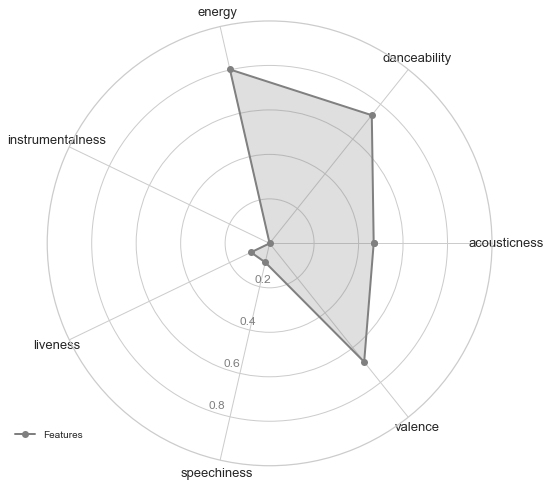

In [21]:
# Here is a polar chart BUT we may want to do a cluster chart
def feature_plot(features):
    labels= list(features)[:]
    stats= features.mean().tolist()

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    #Size of the figure
    fig=plt.figure(figsize = (18,18))

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, label = "Features", color= 'gray')
    ax.fill(angles, stats, alpha=0.25, facecolor='gray')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)


    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color="grey", size=12)
    plt.ylim(0,1)

    plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

# df_features is pull the audio features from positions     
feature_plot(df_features)

In [22]:
# To get more audio features

def get_features(track_id):
    track_features_x = sp.audio_features(track_id)
    dfx = pd.DataFrame(track_features_x, index=[0])
    dfx_features = dfx.loc[: ,['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
    return dfx_features

# Insert a new Track ID // this is the song 'positions' by YTMIXEDIT
df2 = get_features('4TpeDaUZ1pcXClP9gIEgty')
df2


,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.948,0.702,0.221,0.00176,0.101,0.0571,0.961


In [23]:
# This is the song 'postions' by Ariana Grande
df_features

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.468,0.737,0.802,0,0.0931,0.0878,0.682


In [24]:
# list of headers 1 
list(df_features)[:]


['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

In [25]:
# list of headers 2 
list(df2)[:]

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

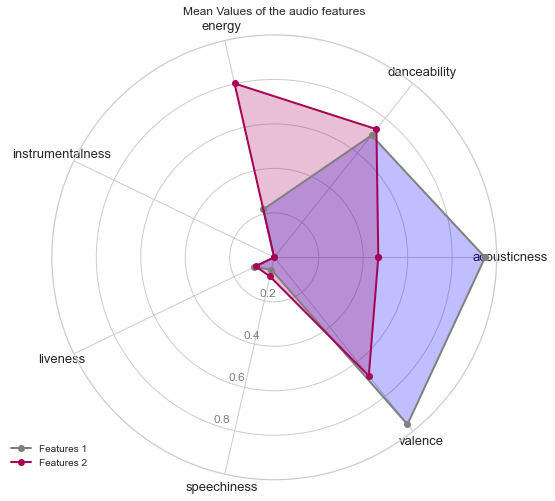

In [26]:
# Going to compare the two song's audio features

def feature_plot2(features1,features2):
    
    labels = list(features1)[:]
    stats = features1.mean().tolist()
    stats2 = features2.mean().tolist()

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)

    # close the plot
    stats = np.concatenate((stats,[stats[0]]))
    stats2 = np.concatenate((stats2,[stats2[0]])) 
    angles = np.concatenate((angles,[angles[0]]))

    #Size of the figure
    fig = plt.figure(figsize = (18,18))

    ax = fig.add_subplot(221, polar=True)
    ax.plot(angles, stats, 'o-', linewidth = 2, label = "Features 1", color = 'gray')
    ax.fill(angles, stats, alpha =0.25, facecolor ='blue')
    ax.set_thetagrids(angles[0:7] * 180/np.pi, labels , fontsize = 13)

    ax.set_rlabel_position(250)
    plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], color ="grey", size =12)
    plt.ylim(0,1)

    ax.plot(angles, stats2, 'o-', linewidth = 2, label = "Features 2", color = 'm')
    ax.fill(angles, stats2, alpha = 0.25, facecolor ='m' )
    ax.set_title('Mean Values of the audio features')
    ax.grid(True)

    plt.legend(loc ='best', bbox_to_anchor =(0.1, 0.1))

# Plot the graph
feature_plot2(df2,df_features)

# Getting song recommendations based on song (uses Spotify API not ML)

In [27]:
import requests
import base64

In [28]:
def get_token(SPOTIPY_CLIENT_ID,SPOTIPY_CLIENT_SECRET):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{SPOTIPY_CLIENT_ID}:{SPOTIPY_CLIENT_SECRET}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [29]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)
song_id = "4BzIFYuujBQsdmELx5fUhA"

In [30]:
token

'BQBltuSxWLZzzt5WI1cyAYoFgwXLt1KpzEX9I_apdg3yWPN1sewhdaruo7MIxQ5MMpwUn1Bu6YSvmv42SMk0SPAAKewE-kYerYCS9oi1ERmaNWCX52hM'

In [31]:
def get_track_recommendations(seed_tracks,token):
    limit = 20
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()

In [32]:
json_response = get_track_recommendations(song_id,token)

In [33]:
json_response

{'tracks': [{'album': {'album_group': 'SINGLE',
    'album_type': 'SINGLE',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3zFfbTj9QY7pvmtjI53DB8'},
      'href': 'https://api.spotify.com/v1/artists/3zFfbTj9QY7pvmtjI53DB8',
      'id': '3zFfbTj9QY7pvmtjI53DB8',
      'name': 'Viola Wills',
      'type': 'artist',
      'uri': 'spotify:artist:3zFfbTj9QY7pvmtjI53DB8'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'ET',
     'FI',
    

In [34]:
uris =[]
for i in json_response['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"Gonna Get Along Without You Now - Extended" by(Viola Wills)
"Chain of Love" by(Silver Convention)
"Love's Theme - Single Version" by(Love Unlimited Orchestra)
"Queen of Fools" by(Jessica Williams)
"San Salvador" by(Azoto)
"If You Could Read My Mind - Radio Edit" by(Viola Wills)
"Disco Kicks - 12" Remix Version" by(Boys Town Gang)
"What's Your Name, What's Your Number" by(Andrea True Connection)
"Que tal America" by(Two Man Sound)
"Don't Stop" by(Sylvester)
"Friday Night" by(Arabesque)
"Give me a Break" by(Vivien Vee)
"Boogie Wonderland" by(Earth, Wind & Fire)
"Don't Stop Dancing" by(France Joli)
"One for You, One for Me" by(La Bionda)
"At Midnight" by(T-Connection)
"Don't Drop My Love" by(Anita Ward)
"I Got My Mind Made Up (You Can Get It Girl)" by(Instant Funk)
"Trouble" by(Lindsey Buckingham)
"Vertigo / Relight My Fire" by(Dan Hartman)


In [35]:
recolist = json_response['tracks']
print(len(recolist))

20


In [36]:
print(recolist)

[{'album': {'album_group': 'SINGLE', 'album_type': 'SINGLE', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3zFfbTj9QY7pvmtjI53DB8'}, 'href': 'https://api.spotify.com/v1/artists/3zFfbTj9QY7pvmtjI53DB8', 'id': '3zFfbTj9QY7pvmtjI53DB8', 'name': 'Viola Wills', 'type': 'artist', 'uri': 'spotify:artist:3zFfbTj9QY7pvmtjI53DB8'}], 'available_markets': ['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BN', 'BO', 'BR', 'BS', 'BT', 'BW', 'BY', 'BZ', 'CA', 'CD', 'CG', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CV', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DM', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'ET', 'FI', 'FJ', 'FM', 'FR', 'GA', 'GB', 'GD', 'GE', 'GH', 'GM', 'GN', 'GQ', 'GR', 'GT', 'GW', 'GY', 'HK', 'HN', 'HR', 'HT', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KG', 'KH', 'KI', 'KM', 'KN', 'KR', 'KW', 'KZ', 'LA', 'LB', 'LC', 'LI', 'LK', 'LR', 'LS', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 

In [37]:
recolist[0]

{'album': {'album_group': 'SINGLE',
  'album_type': 'SINGLE',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3zFfbTj9QY7pvmtjI53DB8'},
    'href': 'https://api.spotify.com/v1/artists/3zFfbTj9QY7pvmtjI53DB8',
    'id': '3zFfbTj9QY7pvmtjI53DB8',
    'name': 'Viola Wills',
    'type': 'artist',
    'uri': 'spotify:artist:3zFfbTj9QY7pvmtjI53DB8'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'ET',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',

In [38]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_group': 'SINGLE', 'album_type': 'SINGL...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,325360,False,{'isrc': 'GBCWS1005002'},{'spotify': 'https://open.spotify.com/track/4P...,https://api.spotify.com/v1/tracks/4PD6BnncbFHq...,4PD6BnncbFHq4dppjon67t,False,Gonna Get Along Without You Now - Extended,36,https://p.scdn.co/mp3-preview/204361be41129cdb...,2,track,spotify:track:4PD6BnncbFHq4dppjon67t
1,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,247973,False,{'isrc': 'US78T0748133'},{'spotify': 'https://open.spotify.com/track/1N...,https://api.spotify.com/v1/tracks/1NtQGtr44WwZ...,1NtQGtr44WwZhnwczTdxAO,False,Chain of Love,2,https://p.scdn.co/mp3-preview/48010eeeb8b65bfa...,2,track,spotify:track:1NtQGtr44WwZhnwczTdxAO
2,"{'album_group': 'SINGLE', 'album_type': 'SINGL...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,219146,False,{'isrc': 'USUMG0000356'},{'spotify': 'https://open.spotify.com/track/4V...,https://api.spotify.com/v1/tracks/4VpLTZ81muzN...,4VpLTZ81muzN8ixvIvhmAt,False,Love's Theme - Single Version,40,None,1,track,spotify:track:4VpLTZ81muzN8ixvIvhmAt
3,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CL, CO, CR, CY, C...",1,504066,False,{'isrc': 'CAU117902283'},{'spotify': 'https://open.spotify.com/track/7E...,https://api.spotify.com/v1/tracks/7E1Uf5LxmEWE...,7E1Uf5LxmEWEXweZGlvckJ,False,Queen of Fools,28,None,1,track,spotify:track:7E1Uf5LxmEWEXweZGlvckJ
4,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,416774,False,{'isrc': 'NLP431800273'},{'spotify': 'https://open.spotify.com/track/3s...,https://api.spotify.com/v1/tracks/3s2FVNc1HsVN...,3s2FVNc1HsVNeTCROnT3ks,False,San Salvador,37,https://p.scdn.co/mp3-preview/93de797c11ef76fc...,4,track,spotify:track:3s2FVNc1HsVNeTCROnT3ks
5,"{'album_group': 'SINGLE', 'album_type': 'SINGL...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,259026,False,{'isrc': 'NL-P43-10-60473'},{'spotify': 'https://open.spotify.com/track/1R...,https://api.spotify.com/v1/tracks/1RZHre7nNyxE...,1RZHre7nNyxEnYQI2Mpwom,False,If You Could Read My Mind - Radio Edit,31,https://p.scdn.co/mp3-preview/ed0c99b460741e2c...,2,track,spotify:track:1RZHre7nNyxEnYQI2Mpwom
6,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,517369,False,{'isrc': 'NLP431210149'},{'spotify': 'https://open.spotify.com/track/2u...,https://api.spotify.com/v1/tracks/2uJ1HDGZUyDZ...,2uJ1HDGZUyDZi6ydENEZ1d,False,"Disco Kicks - 12"" Remix Version",18,https://p.scdn.co/mp3-preview/35388d184600434f...,5,track,spotify:track:2uJ1HDGZUyDZi6ydENEZ1d
7,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,393973,False,{'isrc': 'USBR10300013'},{'spotify': 'https://open.spotify.com/track/6R...,https://api.spotify.com/v1/tracks/6RqUZQlTrPyO...,6RqUZQlTrPyOuO7eLdHQ8D,False,"What's Your Name, What's Your Number",18,https://p.scdn.co/mp3-preview/731f6c1dd8978ea3...,1,track,spotify:track:6RqUZQlTrPyOuO7eLdHQ8D
8,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,288026,False,{'isrc': 'beb019081002'},{'spotify': 'https://open.spotify.com/track/4P...,https://api.spotify.com/v1/tracks/4PKeXkiWmitC...,4PKeXkiWmitCiiBzvO3T

In [39]:
features_df1 = pd.DataFrame()
for id in recommendation_result['id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
#     track_name = id[]
    features_df1 = features_df1.append(local_features)
# sp.audio_features(track_id)

/var/folders/df/2jw1cn_d69j23pvjc1whb2ym0000gn/T/ipykernel_74432/3380498105.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for id in recommendation_result['id'].iteritems():
/var/folders/df/2jw1cn_d69j23pvjc1whb2ym0000gn/T/ipykernel_74432/3380498105.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df1 = features_df1.append(local_features)
/var/folders/df/2jw1cn_d69j23pvjc1whb2ym0000gn/T/ipykernel_74432/3380498105.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df1 = features_df1.append(local_features)
/var/folders/df/2jw1cn_d69j23pvjc1whb2ym0000gn/T/ipykernel_74432/3380498105.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df1

In [40]:
features_df = pd.DataFrame()
for id in recommendation_result['id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df = features_df.append(local_features)

/var/folders/df/2jw1cn_d69j23pvjc1whb2ym0000gn/T/ipykernel_74432/4293700090.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for id in recommendation_result['id'].iteritems():
/var/folders/df/2jw1cn_d69j23pvjc1whb2ym0000gn/T/ipykernel_74432/4293700090.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(local_features)
/var/folders/df/2jw1cn_d69j23pvjc1whb2ym0000gn/T/ipykernel_74432/4293700090.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = features_df.append(local_features)
/var/folders/df/2jw1cn_d69j23pvjc1whb2ym0000gn/T/ipykernel_74432/4293700090.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_df = fe

In [41]:
# features_df.columns
print(recommendation_result.columns)

Index(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
       'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
       'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'],
      dtype='object')


In [44]:
merged_features = pd.merge(features_df, recommendation_result, on = 'id', how = 'left')

merged_features.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type_x', 'id', 'uri_x', 'track_href', 'analysis_url', 'duration_ms_x',
       'time_signature', 'album', 'artists', 'available_markets',
       'disc_number', 'duration_ms_y', 'explicit', 'external_ids',
       'external_urls', 'href', 'is_local', 'name', 'popularity',
       'preview_url', 'track_number', 'type_y', 'uri_y'],
      dtype='object')

In [45]:
merged_features = merged_features[['name','danceability', 'energy' , 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]


In [46]:
merged_features

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Gonna Get Along Without You Now - Extended,0.725,0.629,2,-8.864,1,0.0378,0.013200,0.513000,0.3860,0.757,119.425
1,Chain of Love,0.353,0.449,7,-12.537,1,0.0317,0.104000,0.000134,0.0871,0.746,92.574
2,Love's Theme - Single Version,0.519,0.714,11,-9.790,0,0.0345,0.009500,0.769000,0.3080,0.837,97.457
3,Queen of Fools,0.850,0.695,4,-13.213,0,0.0496,0.001070,0.099700,0.0360,0.892,132.495
4,San Salvador,0.804,0.901,5,-6.747,0,0.0758,0.015000,0.266000,0.0418,0.909,124.780
5,If You Could Read My Mind - Radio Edit,0.633,0.700,7,-10.448,1,0.0462,0.163000,0.003230,0.4240,0.574,124.034
6,"Disco Kicks - 12"" Remix Version",0.697,0.686,3,-10.969,1,0.0388,0.000404,0.001220,0.1770,0.638,132.528
7,"What's Your Name, What's Your Number",0.717,0.840,11,-9.718,0,0.0563,0.091000,0.045000,0.0758,0.890,113.938
8,Que tal America,0.923,0.861,11,-11.240,0,0.0542,0.021600,0.000066,0.0317,0.962,128.687
9,Don't Stop,0.744,0.751,3,-8.236,0,0.0511,0.017400,0.000200,0.5020,0.893,129.837


In [48]:
cluster_feature = pd.get_dummies(merged_features, columns=['danceability', 'energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness',"valence","tempo"])

In [51]:
cluster_feature

,name,danceability_0.353,danceability_0.519,danceability_0.622,danceability_0.633,danceability_0.695,danceability_0.697,danceability_0.717,danceability_0.725,danceability_0.726,...,tempo_124.113,tempo_124.514,tempo_124.78,tempo_124.868,tempo_128.687,tempo_129.837,tempo_131.715,tempo_131.921,tempo_132.495,tempo_132.528
0,Gonna Get Along Without You Now - Extended,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Chain of Love,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Love's Theme - Single Version,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Queen of Fools,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,San Salvador,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,If You Could Read My Mind - Radio Edit,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"Disco Kicks - 12"" Remix Version",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,"What's Your Name, What's Your Number",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Que tal America,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,Don't Stop,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
cluster_feature.drop(columns='name', inplace = True)

In [58]:
model = KMeans(n_clusters=3)

In [59]:
model.fit(cluster_feature)

/Users/saheedosoba/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [60]:
music_cluster = model.predict(cluster_feature)
music_cluster

array([1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1],
      dtype=int32)

In [61]:
merged_features["clusters"] = music_cluster
merged_features

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,clusters
0,Gonna Get Along Without You Now - Extended,0.725,0.629,2,-8.864,1,0.0378,0.013200,0.513000,0.3860,0.757,119.425,1
1,Chain of Love,0.353,0.449,7,-12.537,1,0.0317,0.104000,0.000134,0.0871,0.746,92.574,1
2,Love's Theme - Single Version,0.519,0.714,11,-9.790,0,0.0345,0.009500,0.769000,0.3080,0.837,97.457,0
3,Queen of Fools,0.850,0.695,4,-13.213,0,0.0496,0.001070,0.099700,0.0360,0.892,132.495,0
4,San Salvador,0.804,0.901,5,-6.747,0,0.0758,0.015000,0.266000,0.0418,0.909,124.780,2
5,If You Could Read My Mind - Radio Edit,0.633,0.700,7,-10.448,1,0.0462,0.163000,0.003230,0.4240,0.574,124.034,1
6,"Disco Kicks - 12"" Remix Version",0.697,0.686,3,-10.969,1,0.0388,0.000404,0.001220,0.1770,0.638,132.528,1
7,"What's Your Name, What's Your Number",0.717,0.840,11,-9.718,0,0.0563,0.091000,0.045000,0.0758,0.890,113.938,0
8,Que tal America,0.923,0.861,11,-11.240,0,0.0542,0.021600,0.000066,0.0317,0.962,128.687,0
9,Don't Stop,0.744,0.751,3,-8.236,0,0.0511,0.017400,0.000200,0.5020,0.893,129.837,0


In [ ]:
merged_features.to_sql('songs', )

# base

In [ ]:
track_data = sp.search(q='track:'+'shape',type='track', limit=100)

In [ ]:
track_data

In [ ]:
track_result = []
for i, item in enumerate(track_data['tracks']['items']):
    track = item['album']
    track_id = item['id']
    track_name = item['name']
    popularity = item['popularity']
    track_result.append((i, track['artists'][0]['name'], track['name'], track_id, track_name, track['release_date'], popularity))

In [ ]:
track_result

In [ ]:
track_df = pd.DataFrame(track_result, index=None, columns=('Item', 'Artist', 'Album Name', 'Id', 'Song Name', 'Release Date', 'Popularity'))

In [ ]:
track_df

In [ ]:
features_df = pd.DataFrame()
for id in track_df['Id'].iteritems():
    track_id = id[1]
    audio_features = sp.audio_features(track_id)
    local_features = pd.DataFrame(audio_features, index=[0])
    features_df = features_df.append(local_features)

In [ ]:
features_df

In [ ]:
final_df = track_df.merge(features_df, left_on="Id", right_on="id")

In [ ]:
final_df

In [ ]:
features_df.shape

In [ ]:
final_df_sorted = final_df.sort_values(by=['Popularity'], ascending=False)

In [ ]:
final_df_sorted

In [ ]:
final_df_sorted.dtypes

In [ ]:
new_df = final_df_sorted[["danceability","energy","key","loudness","mode","speechiness","acousticness","liveness"]]
new_df

In [ ]:
#1: find top 1000-more songs by genre
#2: Filter by dropdowns (genre)
#3: Potentially second drop down by song
#4: Select song from cluster where user picks




In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(scaled_df)
visualizer.show()

In [ ]:
feature_name = "liveness"

In [ ]:
df_plot = final_df_sorted[['Artist', 'Album Name', 'Song Name', 'Release Date', 'Popularity', f'{feature_name}']]

In [ ]:
df_plot

In [ ]:
df_new = df_plot[["Popularity","liveness"]]
df_new

In [ ]:
df_new["liveness"].astype(float)

In [ ]:
df_new

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_new)

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(scaled_df)
visualizer.show()